# Properties of the Hydrogen Atom

## Motivation:

[Previous notes](the_hydrogen_atom.ipynb) presented the wave function and energy solution for the Schrodinger equation for the hydrogen atom.  In these notes we present properties of these wavefunctions and energies.

## Learning Goals:

After working through these notes, you will be able to:

1. Define the orthonormality condition of hydrogen atom wave functions
2. Identify when to expect the radial wave functions to be orthogonal
3. Identify when to expect the angular wave functions to be orthogonal
4. Qualitatively describe the electron density for the first few quantum states of the hydrogen atom
5. Compute average properties for the hydrogen atom

## Coding Concepts:

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Review of the Hydrogen Atom Solutions

The complete hydrogen atom wavefunctions are a product of the radial and angular components

$\psi_{nlm_l}(r,\theta,\phi) = R_{nl}(r)Y_l^{m}(\theta,\phi)$

where 
\begin{equation}
Y_l^{m} = \sqrt{\frac{(2l+1)(l-|m|)!}{4\pi(l+|m|)!}}P_l^{|m|}(\cos\theta)e^{im\phi}
\end{equation}
and
\begin{equation}
R_{nl} = -\left[ \frac{(n-l-1)!}{2n[(n+l)!]^3}\right]^{1/2} \left( \frac{2}{na_0}\right)^{l+3/2} r^le^{-r/na_0}L_{n+l}^{2l+1}\left( \frac{2r}{na_0}\right).
\end{equation}

The energies are
\begin{equation}
E_n =  - \frac{e^2}{8\pi\epsilon_0a_0n^2}
\end{equation}


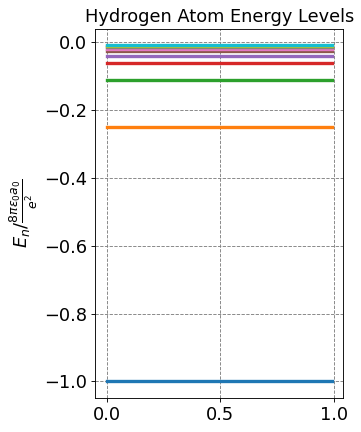

In [1]:
# let's plot some radial wavefunctions of the hydrogen atom
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fontsize = 16
plt.figure(figsize=(4,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=fontsize)
plt.grid(which='major', axis='both', color='#808080', linestyle='--')
plt.title("Hydrogen Atom Energy Levels",fontsize=fontsize)
plt.ylabel(r'$E_n / \frac{8\pi\epsilon_0a_0}{e^2}$',size=fontsize)

# parameters for plotting
nLimit = 10

x = np.arange(0,1,0.01)
for n in range(1,nLimit+1):
    En = -1/n**2
    label = "n = " + str(n)
    plt.plot(x,np.ones(x.size)*En,label=label, lw=3)
#plt.legend(fontsize=12)
plt.show();

## The Radial and Angular Wave Functions are Normalized

The constants with the factorials in the radial and angular wave functions are normalization constants.  They yield normalized wave functions for each indepdendent component.  In turn, the overall wave function is also normalized.

### The Radial Wave Functions are Normalized

The radial wave functions are normalized.  Rather than derive this for you, I will use code and numeric integration to demonstrate that

\begin{equation}
\langle R_{nl}|R_{nl}\rangle = \int_0^\infty R_{nl}^*R_{nl}r^2dr = 1
\end{equation}

for select values of $n$ and $l$.

In [2]:
import numpy as np
from scipy import integrate
from scipy.special import eval_genlaguerre
from scipy.special import factorial
a0 = 1.0 # radial unit of Bohr!    
def hydrogen_atom_radial_wf(r,n,l):
    R_prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
    return R_prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
def integrand(r,n1,l1,n2,l2):
    return r*r*hydrogen_atom_radial_wf(r,n1,l1)*hydrogen_atom_radial_wf(r,n2,l2)

for n in range(1,6):
    for l in range(n):
        print(f"<R_{n}{l}|R_{n}{l}> = ",np.round(integrate.quad(integrand,0,np.infty,args=(n,l,n,l))[0],3))

<R_10|R_10> =  1.0
<R_20|R_20> =  1.0
<R_21|R_21> =  1.0
<R_30|R_30> =  1.0
<R_31|R_31> =  1.0
<R_32|R_32> =  1.0
<R_40|R_40> =  1.0
<R_41|R_41> =  1.0
<R_42|R_42> =  1.0
<R_43|R_43> =  1.0
<R_50|R_50> =  1.0
<R_51|R_51> =  1.0
<R_52|R_52> =  1.0
<R_53|R_53> =  1.0
<R_54|R_54> =  1.0


### The Angular Wave Functions are Normalized

We have already seen this but below I demonstrate that both the $\phi$ and $\theta$ components of the $Y_l^m(\theta, \phi)$ equation are normalized for limited $l$ and $m$ values. A

In [3]:
from scipy import integrate
from scipy.special import lpmv
import numpy as np
from scipy.special import factorial

def theta_norm2(m,l):
    return ((2*l+1)*factorial(l-np.abs(m)))/(2*factorial(l+np.abs(m)))
def integrand(theta,m,l):
    return theta_norm2(m,l)*lpmv(m,l,theta)**2

print ("{:<8} {:<15} {:<20}".format('l','m','<Theta_ml | Theta_ml>'))
print("--------------------------------------------------------------------")
for l in range(4):
    for m in range(l+1):
        print ("{:<8} {:<15} {:<20}".format(l,m,np.round(integrate.quad(integrand,-1,1,args=(m,l))[0],3)))

l        m               <Theta_ml | Theta_ml>
--------------------------------------------------------------------
0        0               1.0                 
1        0               1.0                 
1        1               1.0                 
2        0               1.0                 
2        1               1.0                 
2        2               1.0                 
3        0               1.0                 
3        1               1.0                 
3        2               1.0                 
3        3               1.0                 


In [4]:
from scipy import integrate
from scipy.special import lpmv
import numpy as np

def phi_norm2():
    return 1/(2*np.pi)
def integrand(phi):
    return phi_norm2()

print ("{:<15} {:<20}".format('m','<Phi_m | Phi_m>'))
print("--------------------------------------------------------------------")
for m in range(7):
    print ("{:<15} {:<20}".format(m,np.round(integrate.quad(integrand,0,2*np.pi)[0],3)))

m               <Phi_m | Phi_m>     
--------------------------------------------------------------------
0               1.0                 
1               1.0                 
2               1.0                 
3               1.0                 
4               1.0                 
5               1.0                 
6               1.0                 


## Wave Functions for Different States are Orthogonal

The wave functions for different states, a state is defined by the set of quantum number $(n,l,m)$, are orthogonal.  This is actually dictated by the Postulates of QM because the eigenfunctions of a Hermitian operator must be orthogonal.  

It is important to note, however, that this requirement means
\begin{equation}
\langle \psi_{nlm} | \psi_{n'l'm'} \rangle = \delta_{nn'}\delta_{ll'}\delta_{mm'}
\end{equation}
which is distinct from requiring that $\langle R_{nl} | R_{n'l'} \rangle = \delta_{nn'}\delta_{ll'}$ (***which is not true!***).

It turns out that radial wave functions are only orthogonal when $\Delta l = 0$ and $\Delta n \neq 0$.  The orthogonality of the overall wave functions for situations such as $\Delta l \neq 0$ and $\Delta n \neq 0$ is dictated by the spherical harmonics.

### The Radial Wave Functions are only Orthogonal when $\Delta l = 0$ and $\Delta n \neq 0$

The radial wave functions are only guaranteed to be orthogonal when $n\neq n'$ ***and*** $l=l'$.  

Rather than deriving this, I will show using numeric integration for finite values of n, l, n' and l'.

In [5]:
import numpy as np
from scipy import integrate
from scipy.special import eval_genlaguerre
from scipy.special import factorial
a0 = 1.0 # radial unit of Bohr!    
def hydrogen_atom_radial_wf(r,n,l):
    R_prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
    return R_prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
def integrand(r,n1,l1,n2,l2):
    return r*r*hydrogen_atom_radial_wf(r,n1,l1)*hydrogen_atom_radial_wf(r,n2,l2)

print ("{:<10} {:<10} {:<10} {:<10} {:<20}".format('n', 'n\'', 'l', 'l\'', '<R_nl | R_n\'l\'>'))
print("--------------------------------------------------------------------")
for n1 in range(1,4):
    for l1 in range(n1):
        for n2 in range(1,4):
            for l2 in range(n2):
                print ("{:<10} {:<10} {:<10} {:<10} {:<20}".format(n1, n2, l1, l2, np.round(integrate.quad(integrand,0,np.infty,args=(n1,l1,n2,l2))[0],3)))

n          n'         l          l'         <R_nl | R_n'l'>     
--------------------------------------------------------------------
1          1          0          0          1.0                 
1          2          0          0          -0.0                
1          2          0          1          0.484               
1          3          0          0          -0.0                
1          3          0          1          0.23                
1          3          0          2          0.103               
2          1          0          0          -0.0                
2          2          0          0          1.0                 
2          2          0          1          -0.866              
2          3          0          0          0.0                 
2          3          0          1          0.213               
2          3          0          2          -0.761              
2          1          1          0          0.484               
2          2         

## Probability Densities

### Radial Densities

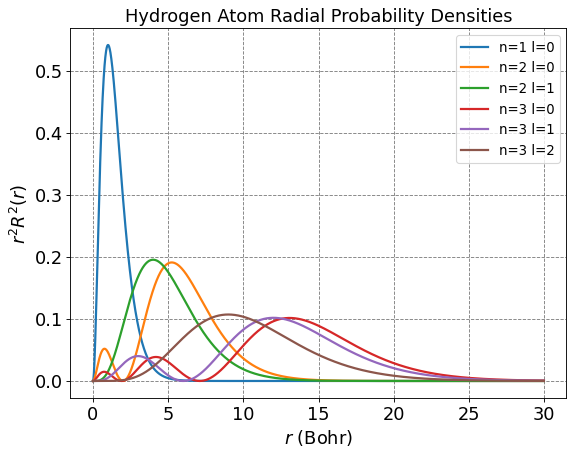

In [6]:
# let's plot some radial wavefunctions of the hydrogen atom
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import factorial
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import plotting as myplt
%matplotlib inline

fontsize = 16
plt.figure(figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=fontsize)
plt.grid(which='major', axis='both', color='#808080', linestyle='--')
plt.title("Hydrogen Atom Radial Probability Densities",fontsize=fontsize)
plt.ylabel(r'$r^2R^2(r)$',size=fontsize)
plt.xlabel(r'$r$ (Bohr)',size=fontsize)

# parameters for plotting
nLimit = 3
a0 = 1.0
r = np.arange(0,30,0.01)

for n in range(1,nLimit+1):
    for l in range(n):
        prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
        R = prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
        label = "n=" + str(n) + " l=" + str(l)
        plt.plot(r,np.power(R,2)*np.power(r,2),label=label, lw=2)
plt.legend(fontsize=12)
plt.show();

### Angular Densities

The angular densitites are equivalent to [previously described](properties_of_particle_in_sphere.ipynb) because the angular components of the wave functions are the equivalent spherical harmonics.  

### Combined Densities

Below we plot various representations of
\begin{equation}
P_{nlm}(r,\theta,\phi) = \psi_{nlm}^*(r,\theta,\phi) \psi_{nlm}(r,\theta,\phi)r^2\sin\theta
\end{equation}

In [7]:
# make two plots of the same spherical harmonic
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import lpmv
from scipy.special import factorial
%matplotlib inline
from scipy.optimize import root
a0 = 1.0 # radial unit of Bohr!    
def hydrogen_atom_prob(r,theta,phi,n,l,m):
    Y_norm = np.sqrt((2*l+1)*factorial(l-np.abs(m))/(2*factorial(l+np.abs(m))))
    R_prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
    R = R_prefactor**2*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
    return Y_norm**2*lpmv(m,l,np.cos(theta))**2*R**2*r**2

def plot_hydrogen_atom_prob(n,l,m, ax_obj, r=np.linspace(0,10,100), theta=np.linspace(0,np.pi,20), phi=np.linspace(0,1.5*np.pi,25)):
    R, THETA, PHI = np.meshgrid(r, theta, phi)
    R = R.flatten()
    THETA = THETA.flatten()
    PHI = PHI.flatten()
    x = R*np.sin(THETA)*np.cos(PHI) 
    y = R*np.sin(THETA)*np.sin(PHI)
    z = R*np.cos(THETA)
    wf = hydrogen_atom_prob(R,THETA,PHI,n,l,m)
    vmax = max(np.abs(np.amin(wf)),np.abs(np.amax(wf)))
    vmin = -vmax
    # plot
    ax_obj.set_title(rf'$n={n},l={l},m={m}$', fontsize=18)
    ax_obj.scatter3D(x,y,z,c=wf, cmap='RdBu', vmin=vmin, vmax=vmax,alpha=0.25)
    ax_obj.set_box_aspect((100,100,100))
    #ax_obj.set_axis_off()
    ax_obj.axes.xaxis.set_ticklabels([])
    ax_obj.axes.yaxis.set_ticklabels([])
    ax_obj.axes.zaxis.set_ticklabels([])
    
def plot_hydrogen_atom_prob_xz_projection(n,l,m, ax_obj):
    x = np.linspace(-10,10,1000)
    z = np.linspace(-10,10,1000)
    X, Z= np.meshgrid(x, z)
    Y = np.zeros(X.shape)
    R = np.sqrt(X*X + Y*Y + Z*Z).flatten()
    THETA = np.arccos(Z.flatten()/R)
    PHI = np.arctan2(Y,X).flatten()
    wf = np.zeros(R.shape)
    wf = hydrogen_atom_prob(R,THETA,PHI,n,l,m)
    wf = wf.reshape(X.shape)
    vmax = max(np.abs(np.amin(wf)),np.abs(np.amax(wf)))
    vmin = -vmax
    # plot
    ax_obj.set_title(rf'$n={n},l={l},m={m}$', fontsize=18)
    c = ax_obj.pcolormesh(X, Z, wf, cmap='RdBu', vmin=vmin, vmax=vmax)
    # set the limits of the plot to the limits of the data
    ax_obj.axis([-10, 10, -10, 10])
    ax_obj.set_aspect('equal')
    #ax_obj.set_axis_off()
    return c

def plot_particle_in_sphere_prob_xy_projection(n,l,m, ax_obj):
    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)
    z = np.zeros(100)
    X, Y= np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    R = np.sqrt(X*X + Y*Y + Z*Z).flatten()
    THETA = np.arccos(Z.flatten()/R)
    PHI = np.arctan2(Y,X).flatten()
    wf = np.zeros(R.shape)
    indeces = np.argwhere(R <= 1)
    wf[indeces] = particle_in_sphere_prob(R[indeces],THETA[indeces],PHI[indeces],n,l,m)
    wf = wf.reshape(X.shape)
    # plot
    ax_obj.set_title(rf'$n={n},l={l},m={m}$', fontsize=18)
    c = ax_obj.pcolormesh(X, Y, wf, cmap='RdBu', vmin=-0.2, vmax=0.2)
    # set the limits of the plot to the limits of the data
    ax_obj.axis([-1, 1, -1, 1])
    ax_obj.set_aspect('equal')
    ax_obj.set_axis_off()
    return c

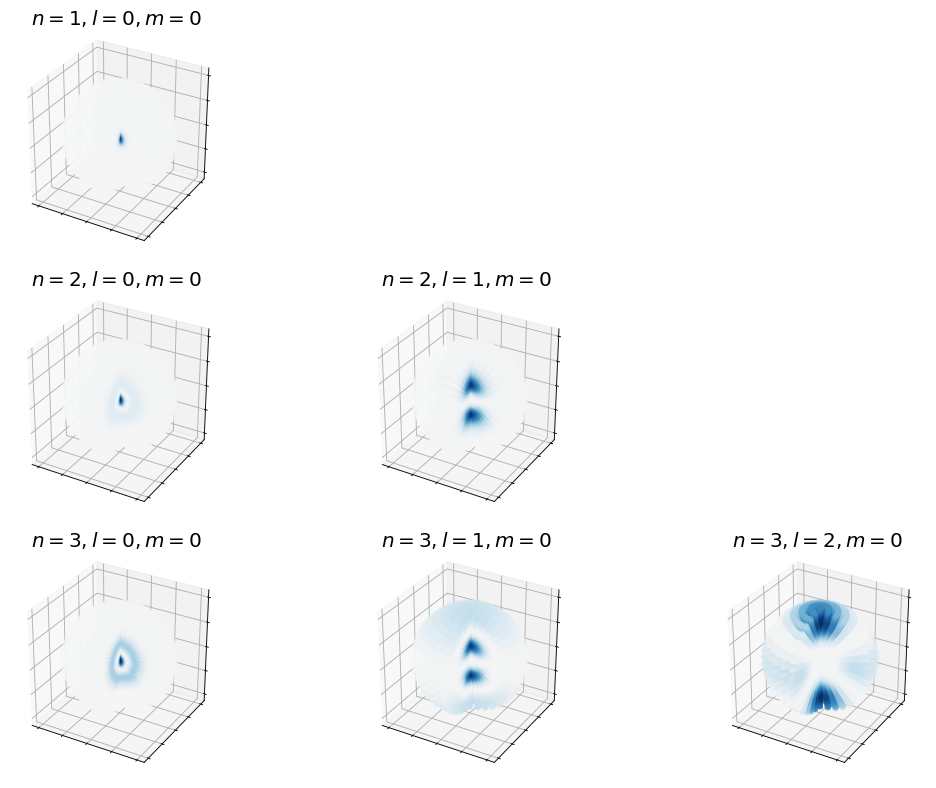

In [8]:
fig, ax = plt.subplots(3,3,figsize=(16,12),dpi= 80, facecolor='w', edgecolor='k',subplot_kw={'projection': '3d'}) 
for n in range(1,4):
    for l in range(3):
        if l < n:
            plot_hydrogen_atom_prob(n,l,0,ax[n-1,l])
        else: 
            ax[n-1,l].set_axis_off()
plt.show();

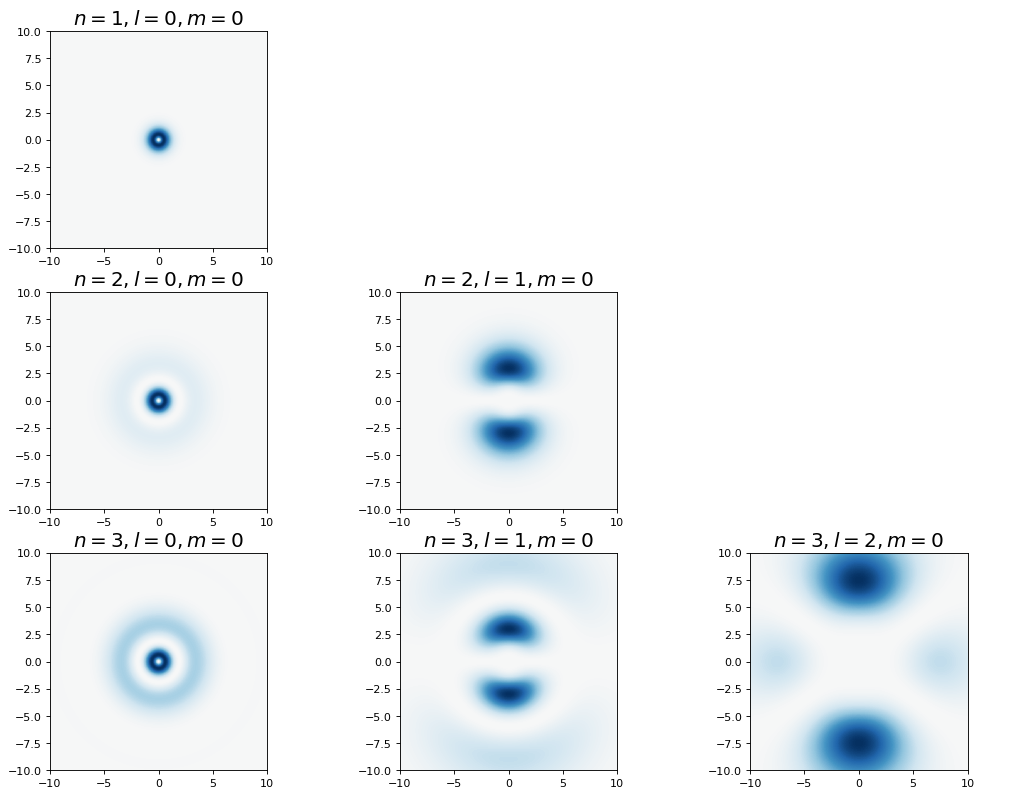

In [9]:
fig, ax = plt.subplots(3,3,figsize=(16,12),dpi= 80, facecolor='w', edgecolor='k') 
for n in range(1,4):
    for l in range(3):
        if l < n:
            plot_hydrogen_atom_prob_xz_projection(n,l,0,ax[n-1,l])
        else: 
            ax[n-1,l].set_axis_off()
plt.show();

## Average Properties

Now that we have defined the normalized wave functions and looked at the probability densities, we can compute average properties as defined by
\begin{equation}
\langle a \rangle_{nlm} = \int_0^\infty\int_0^\pi \int_0^{2\pi} \psi_{nlm}^*(r,\theta,\phi)\hat{A}\psi_{nlm}(r,\theta,\phi)r^2\sin\theta dr d\theta d\phi
\end{equation}

For the hydrogen atom, we use the following shorthand to denote the average in a certain quantum state
\begin{align}
\langle a \rangle_{nlm} &= \langle \psi_{nlm}|\hat{A} |\psi_{nlm}(r,\theta,\phi)\rangle \\
&= \langle n,l,m |\hat{A} |n,l,m\rangle
\end{align}

Below, I compute the average value of $r$ for various states (note that since the operator $r$ only depends on the coordinte $r$, I can integrate out the $\theta$ and $\phi$ dependence and only consider the integral over $r$.)

In [10]:
import numpy as np
from scipy import integrate
from scipy.special import eval_genlaguerre
from scipy.special import factorial
a0 = 1.0 # radial unit of Bohr!    
def hydrogen_atom_radial_wf(r,n,l):
    R_prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
    return R_prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
def integrand(r,n1,l1,n2,l2):
    return r**3*hydrogen_atom_radial_wf(r,n1,l1)*hydrogen_atom_radial_wf(r,n2,l2)

print ("{:<10} {:<10} {:<20}".format('n', 'l', '<n l | r | n l>'))
print("--------------------------------------------------------------------")
for n in range(1,5):
    for l in range(n):
                print ("{:<10} {:<10} {:<20}".format(n, l, np.round(integrate.quad(integrand,0,np.infty,args=(n,l,n,l))[0],3)))

n          l          <n l | r | n l>     
--------------------------------------------------------------------
1          0          1.5                 
2          0          6.0                 
2          1          5.0                 
3          0          13.5                
3          1          12.5                
3          2          10.5                
4          0          24.0                
4          1          23.0                
4          2          21.0                
4          3          18.0                
